<a href="https://colab.research.google.com/github/rpizarrog/Analisis-Inteligente-de-datos/blob/main/bloc%20de%20notas/Caso_5_Regresi%C3%B3n_Lineal_Simple_pob_conf_municipios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso 5. Regresión Lineal Simple. Datos de poblacion y confirmados de Municipios

## Objetivo 

Realizar una tarea de predicción de casos confirmados en datos de municipois de la República Mexicana mediante el algoritmo de machine learnig de regresión lineal simple.

## Descripción

* Cargar datos de cantidad de habitantes de una población de municipios y sus casos confirmados de COVID.
Los datos son casos confirmados en periodo de 02-02-2020 al 18-09-2021 en formado DD-MM-AAAA (dia-mes-año).
* Archivo csv localizado en: [github](https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/poblacion%20confirmados%20municipio.csv).
* Fuente obtenida de datos del gobierno de México de [texto del vínculo](https://datos.covid-19.conacyt.mx/#DownZCSV).
* Explorar los datos.
* Definir la varible independiente y la variable dependiente.
* Aplicar el modelo de regresión lineal simple.
* Evaluar el modelo, con error cuadrado medio y su significado.
* Hacer estimaciones para una cirta cantidad de población para determinar cuantos casos confirmados serían. Son Predicciones.




## Fundamento Teórico

Pendiente


## Desarrollo

### Librerías




In [ ]:
# Datos
import numpy as np
import pandas as pd
import seaborn as sb

# Gráficos
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Regresiones lineales
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Cargar los datos



In [38]:

datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/poblacion%20confirmados%20municipio.csv")

datos.shape # La estructura de los datos 



(2457, 4)

In [39]:
datos[["poblacion", "confirmados"]].describe() # Estadísticos elementales

,poblacion,confirmados
count,2.457000e+03,2457.000000
mean,5.201151e+04,1452.297924
std,1.475537e+05,7135.481990
min,9.500000e+01,0.000000
25%,4.470000e+03,18.000000
50%,1.413700e+04,87.000000
75%,3.709900e+04,390.000000
max,1.815551e+06,147221.000000


In [40]:
datos

,cve_ent,nombre,poblacion,confirmados
0,16046,Juarez,15290,203
1,16047,Jungapeo,22358,92
2,16048,Lagunillas,5862,53
3,16049,Madero,18769,72
4,5035,Torreon,744247,19402
...,...,...,...,...
2452,32053,Villa Gonzalez Ortega,13945,142
2453,32054,Villa Hidalgo,20177,112
2454,32055,Villanueva,31804,497
2455,32056,Zacatecas,155533,9764


### Visualización de datos

#### Histograma

Se visualizan los histogramas únicamente de las variables numericas dependiente e independiente.



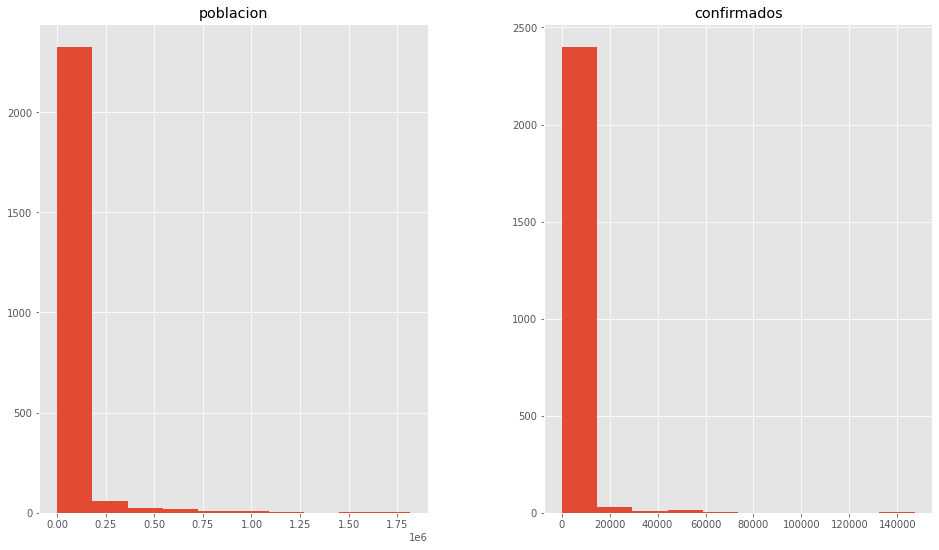

In [41]:
# datos.drop(['cve_ent','nombre'],1).hist()
datos[["poblacion", "confirmados"]].hist()
plt.show()

Las variables no tienen un comportamiento gaussiaado o que parten de una distribución normal lo que conlleva a dudar de si vale la pena aplicar regresión lienal simple.
Se recomienda hacer pruebas de normalidad, perndiente ...

Diagrama de dispersión


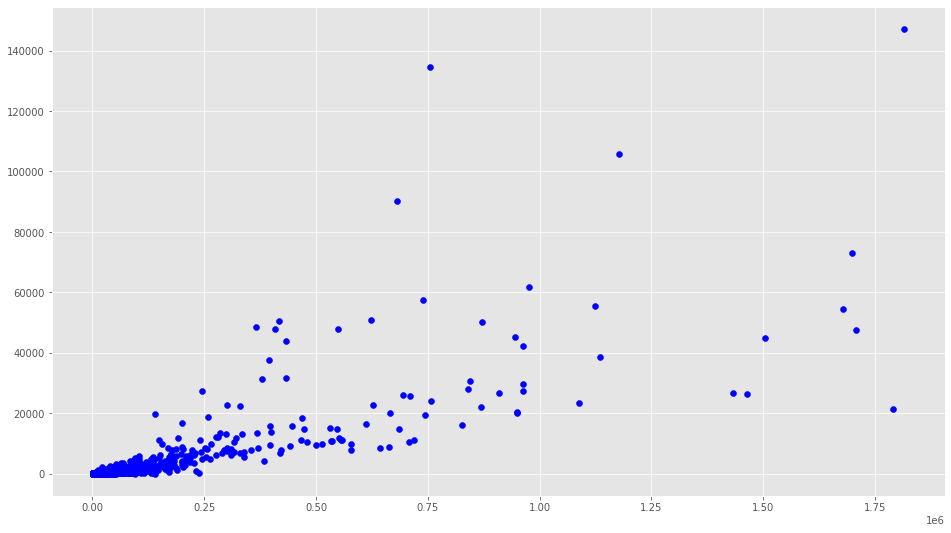

In [42]:
plt.scatter(datos['poblacion'], datos['confirmados'], c='blue')
plt.show()

### Aplicar modelos de regresión

Se utiliza la función linear_model.LinearRegression() para construir la regresión lineal.

Se almacena la regresiín en una variable llamada regr

Se construye un modelo de entrenamiento con todos los datos.

In [47]:
regr = linear_model.LinearRegression()
poblacion = np.array(datos['poblacion'])

poblacion

confirmados = np.array(datos['confirmados'])
confirmados






array([ 203,   92,   53, ...,  497, 9764,   38])

In [48]:
regr.fit(poblacion.reshape(-1, 1), confirmados)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Objeto de prediccion

Se construye objeto de prediccion para construir la recta lineal



In [49]:
y_pred = regr.predict(poblacion.reshape(-1, 1))
y_pred


array([  39.54377041,  311.46466101, -323.17130551, ...,  674.87223495,
       5434.98823285, -438.85694756])

### Evaluar el modelo

Se muestran los valores de los coeficientes de la ecuación 

$$
Y = \beta0 + \beta1\cdot{x_i}
$$

In [50]:
print('Coefficients: \n', regr.coef_)

# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
 
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(confirmados, y_pred))
 
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(confirmados, y_pred))

Coefficients: 
 [0.03847211]
Independent term: 
 -548.6948285271917
Mean squared error: 18682525.19
Variance score: 0.63


$$ \beta0 = -548.6948285271917$$
$$\beta1 = 0.03847211$$


$$
Y = −548.6948285271917 + 0.0.0.03847211 \cdot{x_i}
$$

¿Cuántos casos confirmados debiera para una pobción 500000



$$ Y = -548.6948285271917 + 0.03847211 \times{50000}$$
$$ 1374.911 = -548.69482852719177 + 0.03847211 \times{50000} $$


### Visualizar recta





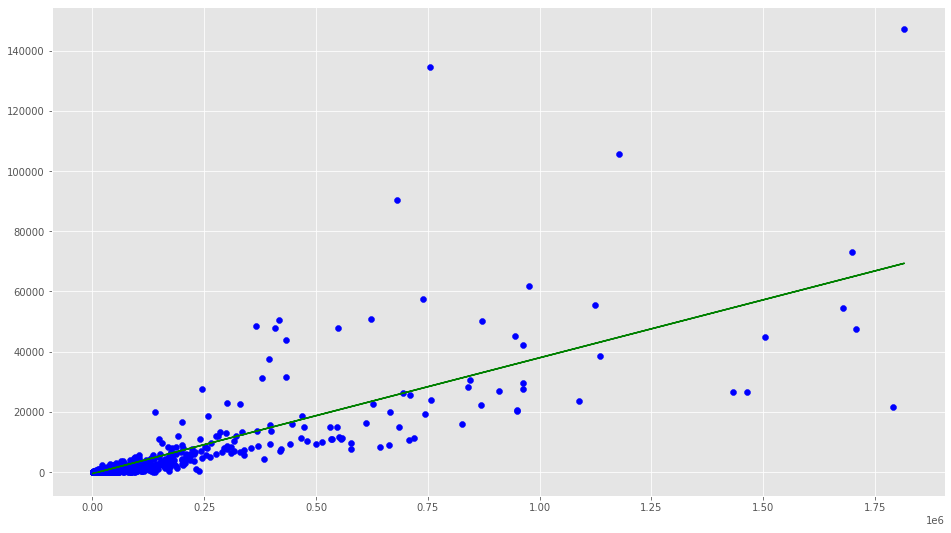

In [52]:
plt.scatter(datos['poblacion'], datos['confirmados'], c='blue')
plt.plot(poblacion, y_pred, c='green')
plt.show()

### Predecir valores

¿Cual es la prediccion de casos confirmados para una pobacion de 50,000?

¿Cual es la prediccion de casos confirmados para una pobacion de 100,000?

¿Cual es la prediccion de casos confirmados para una pobacion de 200,000?

In [53]:
prediccion = regr.predict([[50000]])
print(int(prediccion))


1374


In [54]:
prediccion = regr.predict([[100000]])
print(int(prediccion))

3298


In [55]:
prediccion = regr.predict([[250000]])
print(int(prediccion))

9069


In [56]:
prediccion = regr.predict([[500000]])
print(int(prediccion))

18687


In [ ]:
prediccion = regr.predict([[750000]])
print(int(prediccion))

210691


## Interpretación

La regresión lineal en el contexto de las predicciones permite mediane la ecuación de mínimos cuadrados identificar los coefientes $b0$ y $b1$ que p-ermite hacer y constrir predicciones para cualquier valor de $x_i$

En este caso 5, la regresión lineal explica la relación lineal entre pobación y casos confimados de COVID, se hicieron rpedicciones con varios valores de pobación generando predicciones conforme la recta y la ecuación y sus coeficientes..

Para una población de $50000$ se estima una catidad de casos confiramdos alrededor de $1374$.

Pendiente de alumnos ...

